In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, precision_score, recall_score, accuracy_score
from category_encoders import TargetEncoder

In [2]:
# Variables to store values pulled from settings screen in UI
train_file = "C:/Users/brody/OneDrive/Desktop/Capstone Project/UNSW_NB15_training-set.csv"
test_file = "C:/Users/brody/OneDrive/Desktop/Capstone Project/UNSW_NB15_testing-set.csv"
n_estimators_val = 450
max_features_val = 2
random_state_val = 3
max_depth_val = 4
min_samples_leaf_val = 75
abnormality_threshold = 4

In [3]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [4]:
train = TargetEncoder(cols=['proto', 'service', 'state', 'attack_cat'], smoothing=1.0).fit(train, train['label']).transform(train)
test = TargetEncoder(cols=['proto', 'service', 'state', 'attack_cat'], smoothing=1.0).fit(test, test['label']).transform(test)

C:\Users\brody\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\brody\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\brody\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\brody\anaconda3\lib\site-packages\category_encoders\target_e

In [5]:
X_train = train.iloc[:, 1:44].values
y_train = train.iloc[:, 44].values

In [6]:
X_test = test.iloc[:, 1:44].values
y_test = test.iloc[:, 44].values

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
forest = RandomForestClassifier(n_estimators = n_estimators_val, max_features = max_features_val, random_state = random_state_val, max_depth = max_depth_val, min_samples_leaf = min_samples_leaf_val)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018130385933694915
Mean Squared Error: 0.018130385933694915
Root Mean Squared Error: 0.13464912154817393


[[ 53005   2995]
 [   184 119157]]


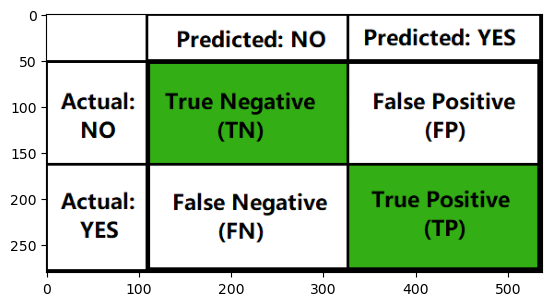

In [10]:
print(confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("C:/Users/brody/OneDrive/Desktop/Capstone Project/confusion matrix.png")
imgplot = plt.imshow(img)
plt.show()

In [11]:
print('Training Accuracy : ', metrics.accuracy_score(y_train, y_pred_train)*100)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, y_pred)*100)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Training Accuracy :  95.71491036292086
Validation Accuracy :  98.18696140663052
Precision: 0.975
Recall: 0.998
